## Notas de aula de Teoria de Grupos <br> Autor: Jonas Maziero

In [23]:
%run init.ipynb

# Grupos $GL(n,\mathbb{F})$, $U(n)$, $U(1)$, $SU(n)$, $O(n)$, $SO(n)$ e $Sp(2n,\mathbb{F})$

<a id="sec_gl"></a>
## Grupo linear geral, $GL(n,\mathbb{F})$
As matrizes $n\mathrm{x}n$ sobre o campo escalar $\mathbb{F}$, i.e., $A\in\mathbb{F}^{n\text{x}n}$, com determinante diferente de zero, $\det(A)\ne 0$, formam um grupo sob a operação $*=$ produto matricial, chamado de grupo linear geral e denotado por $GL(n,\mathbb{F}).$ 

Para verificar essa afirmação, lembramos que $$\det(AB)=\det(A)\det(B)\ne 0$$ se $A$ e $B$ possuem inversa. Isso implicade que se $A,B\in GL(n,\mathbb{F})$ então $AB\in GL(n,\mathbb{F})$ (fechamento). Associatividade vem da associatividade do produto matricial. A identidade de $GL(n,\mathbb{F})$ é a matriz identidade $n\text{x}n$. Para qualquer $A\in GL(n,\mathbb{C})$ o elemento inverso é $A^{-1}=cof(A)^{T}/\det(A)\in GL(n,\mathbb{C}).$

## Grupo unitário, $U(n)$
As matrizes unitárias $n\mathrm{x}n$, matrizes cuja adjunta é igual à inversa ($U^{\dagger}=U^{-1}$), também formam um grupo sob a operação de produto matricial. Esse grupo é chamado de grupo unitário e é denotado por $U(n),$ e é um subgrupo de $GL(n,\mathbb{F})$. Aqui também verificamos prontamente a estrutura de grupo pois se $A,B\in U(n)$ então $$AB(AB)^{\dagger}=ABB^{\dagger}A^{\dagger}=A\mathbb{I}_{n}A^{\dagger}=AA^{\dagger}=\mathbb{I}_{n}.$$

## Grupo circular, $U(1)$
A operação de multiplicação por uma fase $e^{i\phi}$ também forma um grupo, chamado de grupo circular (pois é formado pelo círculo de números complexos com módulo igual a um) e denotado por $U(1).$

## Grupo unitário especial, $SU(n)$
Se $A\in U(n)$ e $A|a\rangle=a|a\rangle$ então $|a|=1\therefore a = e^{i\phi}$. Como para $B\in U(n)$ temos \begin{align}
\det(A) &= \det(BAB^{\dagger})=\det(diag(e^{i\phi_{1}},\cdots,e^{i\phi_{n}}))=\Pi_{j=1}^{n}e^{i\phi_{j}}=e^{i\sum_{j=1}^{n}\phi_{j}} \\ 
&=: e^{i\phi}.
\end{align}
As matrizes unitárias $n\mathrm{x}n$ com determinante igual a um (i.e., $\phi=0$) também formam um grupo, chamado grupo unitário especial e denotado por $SU(n),$ que é um subgrupo de $U(n)$. Para verificar composição notamos que $$\det(AB)=\det(A)\det(B)=(1)(1)=1$$ se $A,B\in SU(n)$.

## $U(3)$ a partir de $U(2)$
Uma tarefa muito comum em teoria de grupos é a de escrevermos um conjunto de transformações de simetria em termos de transformações mais simples. A seguir veremos um exemplo deste procedimento.
Considera um elemento qualquer $U\in U(3)$ escrito, na base padrão $\{|e_{1}\rangle,|e_{2}\rangle,|e_{3}\rangle\}$, como:
\begin{equation}
U = \begin{bmatrix} a&d&g \\ b&e&h \\c&f&i \end{bmatrix}. \hspace{2cm}(\star)
\end{equation}
Vamos construir $U_{1},U_{2},U_{3}\in U(2)$ tais que $U_{3}U_{2}U_{1}U=\mathbb{I}_{3}$, i.e., 
\begin{equation}
U=U_{1}^{\dagger}U_{2}^{\dagger}U_{3}^{\dagger}.
\end{equation}
OBS. Na realidade, as matrizes $U_{1},U_{2},U_{3}\in U(3)$, mas são isomórficas a matrizes de $U(2).$ 

* Essa construção é feita como segue. Se $b=0$ faz $U_{1}=\mathbb{I}_{3}$ senão faz
\begin{equation}
U_{1} = \begin{bmatrix} a^{*}/s & b^{*}/s & 0 \\ b/s & -a/s & 0 \\ 0 & 0 & 1 \end{bmatrix},
\end{equation}
com $s:=\sqrt{|a|^{2}+|b|^{2}}$. O código abaixo é utilizado para verificar a unitariedade de $U_{1}$ e para multiplicá-la por $U$.

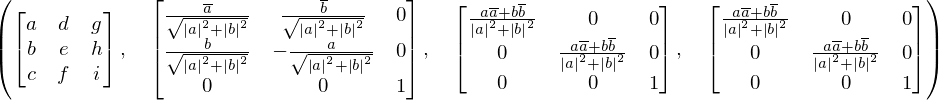

In [2]:
a,b,c,d,e,f,g,h,i = symbols("a,b,c,d,e,f,g,h,i"); U = Matrix([[a,d,g],[b,e,h],[c,f,i]])
s = sqrt(abs(a)**2+abs(b)**2); U1 = Matrix([[conjugate(a)/s,conjugate(b)/s,0],[b/s,-a/s,0],[0,0,1]])
U, U1, simplify(U1*Dagger(U1)), simplify(Dagger(U1)*U1) # verificação que U1 é unitária. ok!

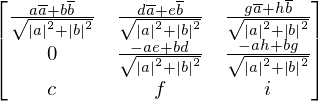

In [3]:
simplify(U1*U)

Definimos assim
\begin{align}
U_{1}U &= \begin{bmatrix} a^{*}/s & b^{*}/s & 0 \\ b/s & -a/s & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} a&d&g \\ b&e&h \\c&f&i \end{bmatrix} 
= \begin{bmatrix} s & (da^{*}+eb^{*})/s & (ga^{*}+hb^{*})/s \\ 0 & (-ae+bd)/s & (-ah+bg)/s \\ c & f & i \end{bmatrix} \\ 
& =: \begin{bmatrix} a' & d' & g' \\ 0 & e' & h' \\ c' & f' & i' \end{bmatrix}.
\end{align}

* Seguindo, se $c'=c=0$ faz $U_{2}=\mathbb{I}_{3}$, senão faz
\begin{equation}
U_{2} = \begin{bmatrix} a'^{*}/s' & 0 & c'^{*}/s' \\ 0 & 1 & 0 \\ c'/s' & 0 & -a'/s' \end{bmatrix},
\end{equation}
com $s':=\sqrt{|a'|^{2}+|c'|^{2}}=\sqrt{|a|^{2}+|b|^{2}+|c|^{2}}$. O código abaixo é utilizado para verificar a unitariedade de $U_{2}$ e para multiplicá-la por $U_{1}U$.

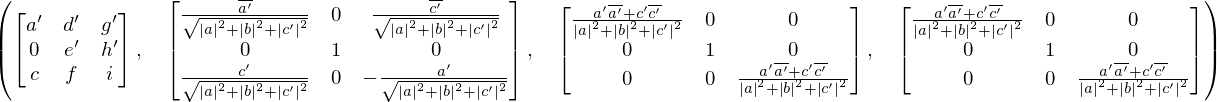

In [4]:
al,bl,cl,dl,el,fl,gl,hl,il,sl = symbols("a',b',c',d',e',f',g',h',i',s'")
U1U = Matrix([[al,dl,gl],[0,el,hl],[c,f,i]]); sl = sqrt(s**2+abs(cl)**2)
U2 = Matrix([[conjugate(al)/sl,0,conjugate(cl)/sl],[0,1,0],[cl/sl,0,-al/sl]])
U1U, U2, simplify(U2*Dagger(U2)), simplify(Dagger(U2)*U2) # verificação que U2 é unitária. ok!

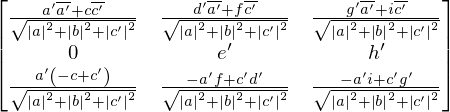

In [5]:
simplify(U2*U1U)

Definimos assim
\begin{align}
U_{2}U_{1}U &= \begin{bmatrix} a'^{*}/s' & 0 & c'^{*}/s' \\ 0 & 1 & 0 \\ c'/s' & 0 & -a'/s' \end{bmatrix}\begin{bmatrix} a' & d' & g' \\ 0 & e' & h' \\ c' & f' & i' \end{bmatrix} 
= \begin{bmatrix} s' & (d'a'^{*}+f'c'^{*})/s' & (g'a'^{*}+i'c'^{*})/s' \\ 0 & e' & h' \\ 0 & (c'd'-f'a')/s' & (c'g'-i'a')/s' \end{bmatrix} \\ 
& =:\begin{bmatrix} a'' & d'' & g'' \\ 0 & e'' & h'' \\ 0 & f'' & i'' \end{bmatrix}. \hspace{1cm}(\star\star)
\end{align}
Essa matriz é unitária pois $$(U_{2}U_{1}U)^{\dagger}U_{2}U_{1}U = U^{\dagger}U_{1}^{\dagger}U_{2}^{\dagger}U_{2}U_{1}U=\mathbb{I}_{3}=U_{2}U_{1}U(U_{2}U_{1}U)^{\dagger}.$$ Portanto seus vetores linha e vetores coluna devem ter norma $=1$. Isso implica que $$a''=1,$$ que é satisfeito pois $a''=s'=\sqrt{|a|^{2}+|b|^{2}+|c|^{2}}=|||C_{1}^{U}\rangle||$, e que consequentemente $$d''=g''=0.$$ Na verdade, pode-se verificar que $d''\propto\langle C_{1}^{U}|C_{2}^{U}\rangle$ e $g''\propto\langle C_{1}^{U}|C_{3}^{U}\rangle.$

Por conseguinte
\begin{equation}
U_{2}U_{1}U =: \begin{bmatrix} 1 & 0 & 0 \\ 0 & e'' & h'' \\ 0 & f'' & i'' \end{bmatrix}.
\end{equation}

* Por fim, definimos
\begin{equation}
U_{3} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & e''^{*} & f''^{*} \\ 0 & h''^{*} & i''^{*} \end{bmatrix}.
\end{equation}
A unitariedade de $U_{3}$ é verificada com a ajuda do código abaixo.

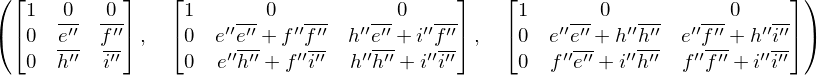

In [6]:
ell,fll,hll,ill = symbols("e'',f'',h'',i''")
U3 = Matrix([[1,0,0],[0,conjugate(ell),conjugate(fll)],[0,conjugate(hll),conjugate(ill)]])
U3, simplify(U3*Dagger(U3)), simplify(Dagger(U3)*U3) # verificação que U3 é unitária. ok!

Vemos que $U_{3}$ é unitária pois, pela unitariedade de $U_{2}U_{1}U$, temos que ($W\equiv U_{2}U_{1}U$)
\begin{align}
& \langle C_{2}^{W}|C_{2}^{W}\rangle=1 \Rightarrow |e''|^{2}+|f''|^{2}=1, \\
& \langle C_{2}^{W}|C_{3}^{W}\rangle=0 \Rightarrow e''^{*}h''+f''^{*}i''=0, \\
& \langle C_{3}^{W}|C_{2}^{W}\rangle=0 \Rightarrow h''^{*}e''+i''^{*}f''=0, \\
& \langle C_{3}^{W}|C_{3}^{W}\rangle=1 \Rightarrow |h''|^{2}+|i''|^{2}=1.
\end{align}
Com a ajuda do código abaixo, e pela unitariedade de $U_{2}U_{1}U$, obtemos $$U_{3}U_{2}U_{1}U=\mathbb{I}_{3}.$$

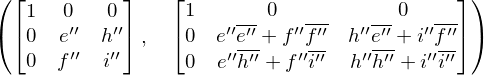

In [7]:
U2U1U = Matrix([[1,0,0],[0,ell,hll],[0,fll,ill]]); U2U1U, U3*U2U1U

Fornecida a matriz unitária $U$, o código abaixo retorna as matrizes unitárias $\{U_{j}\}_{j=1}^{3}$ tais que $U=U_{1}^{\dagger}U_{2}^{\dagger}U_{3}^{\dagger}.$

In [8]:
def u3_from_u2(U):
    '''Returs U1d, U2d, U3d such that U = U1d*U2d*U3d'''
    s = sqrt(abs(U[0,0])**2+abs(U[1,0])**2)
    if U[1,0] == 0: # verifica se b = 0
        U1 = id(3)
    else:
        U1 = Matrix([[conjugate(U[0,0])/s,conjugate(U[1,0])/s,0],
                     [U[1,0]/s,-U[0,0]/s,0],[0,0,1]])
    sl = sqrt(s**2+abs(U[2,0])**2)
    if U[2,0] == 0: # verifica se c = 0
        U2 = id(3)
    else:
        U2 = Matrix([[s/sl,0,conjugate(U[2,0])/sl],[0,1,0],
                     [U[2,0]/sl,0,-s/sl]])
    ell = (U[1,0]*U[0,1]-U[0,0]*U[1,1])/s
    hll = (U[1,0]*U[0,2]-U[0,0]*U[1,2])/s
    dl = (U[0,1]*conjugate(U[0,0])+U[1,1]*conjugate(U[1,0]))/s
    fll = (U[2,0]*dl-s*U[2,1])/sl
    gl = (U[0,2]*conjugate(U[0,0])+U[1,2]*conjugate(U[0,1]))/s
    ill = (U[2,0]*gl-s*U[2,2])/sl
    if fll == 0:
        U3 = id(3)
    else:
        U3 = Matrix([[1,0,0],[0,conjugate(ell),conjugate(fll)],
                     [0,conjugate(hll),conjugate(ill)]])
    return Dagger(U1), Dagger(U2), Dagger(U3)

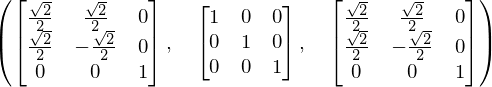

In [9]:
U = (1/sqrt(2))*Matrix([[1,1,0],[1,-1,0],[0,0,sqrt(2)]])
#U = id(3)
U1d, U2d, U3d = u3_from_u2(U); U, simplify(U*Dagger(U)), simplify(U1d*U2d*U3d)

OBS. Podemos usar o mesmo tipo de procedimento para escrever qualquer transformação de $U(n)$ em termos da composição de transformações de $U(2).$

## Grupo ortogonal, $O(n)$
As matrizes ortogonais $n\mathrm{x}n$, i.e., as matrizes cuja transposta é igual à inversa ($O^{T}=O^{-1}$), formam um grupo sob multiplicação, que é chamado de grupo ortogonal e é denotado por $$O(n).$$ Verificamos a estrutura de grupo notando que se $A,B\in O(n)$ então
\begin{equation}
AB(AB)^{T}=ABB^{T}A^{T}=A\mathbb{I}_{n}A^{T} =AA^{T}=\mathbb{I}_{n}.
\end{equation}

OBS. Claro, $O(n)$ é um subgrupo do grupo [$GL(n,\mathbb{F})$](#sec_gl).

## Grupo ortogonal especial, $SO(n)$
Para $A\in O(n)$ temos $$\det(AA^{T})=\det(A)\det(A^{T})=\det(A)^{2}=\det(\mathbb{I})=1\therefore \det(A)=\pm 1.$$  As matrizes ortogonais com determinante $=1$ também formam um grupo, chamado de grupo ortogonal especial e denotado por $$SO(n).$$

A verificação é fácil pois se $A,B\in SO(n)$ então $\det(AB)=\det(A)\det(B)=(1)(1)=1.$

## Matrizes de rotação em $\mathbb{R}^{n}$
O vetor posição pode ser escrito em diferentes referencias como: $$\vec{r} = \sum_{j}x_{j}\hat{e}_{j} = \sum_{j}x'_{j}\hat{e'}_{j}=\vec{r'}.$$ Para rotações do referencial, o chamado ponto de vista passivo, consideremos que os versores nos diferentes referenciais são relacionados pela matriz de rotação:
\begin{equation}
\hat{e'}_{j}=\sum_{k}A_{j,k}\hat{e}_{k}\therefore\begin{bmatrix}\hat{e'}_{1}\\\vdots\\\hat{e'}_{n}\end{bmatrix}=A\begin{bmatrix}\hat{e}_{1}\\\vdots\\\hat{e}_{n}\end{bmatrix}.
\end{equation}

Como rotações devem preservar o produto interno, devemos ter que
\begin{align}
\delta_{j,k} & = \hat{e'}_{j}\cdot\hat{e'}_{k} = \sum_{l}A_{j,l}\hat{e}_{l}\cdot\sum_{m}A_{k,m}\hat{e}_{m} = \sum_{l,m}A_{j,l}A_{k,m}\hat{e}_{l}\cdot\hat{e}_{m} = \sum_{l,m}A_{j,l}A_{k,m}\delta_{l,m}  \\
& = \sum_{l}A_{j,l}A_{k,l} = \sum_{l}A_{j,l}(A^{T})_{l,k} = (AA^{T})_{j,k} \\
& \Rightarrow AA^{T}=\mathbb{I}_{n}.
\end{align}
Pode-se verificar também que $A^{T}A=\mathbb{I}$. Portanto $A\in O(n)$. 

Assim
\begin{align}
\vec{r'} & = \sum_{j}x'_{j}\hat{e'}_{j} = \sum_{j}x'_{j}\sum_{k}A_{jk}\hat{e}_{k} = \sum_{k}\left(\sum_{j}(A^{T})_{kj}x'_{j}\right)\hat{e}_{k} = \sum_{k}x_{k}\hat{e}_{k}=\vec{r}.
\end{align}
Ou seja, se giramos o vetor sem mudar o referencial, o chamado ponto de vista ativo, teremos
\begin{equation}
\vec{r}=A^{T}\vec{r'}.
\end{equation}


Ademais, notemos que 
\begin{equation}
\hat{e}_{l}\cdot\hat{e'}_{j}=\hat{e}_{l}\cdot\sum_{k}A_{j,k}\hat{e}_{k}=\sum_{k}A_{j,k}\hat{e}_{l}\cdot\hat{e}_{k}=A_{j,l}=\cos(\text{ângulo entre } \hat{e}_{l} \text{ e } \hat{e'}_{j}).
\end{equation}

## Rotações em $\mathbb{R}^{3}$
### Rotações em torno de $z$
Para rotações do referencial em torno da direção $z$ positiva, temos as seguintes relações entre os versores (veja a figura abaixo):
\begin{equation}
\begin{cases}
\hat{i'} = \hat{i}\cos\theta+\hat{j}\sin\theta, \\
\hat{j'} = -\hat{i}\sin\theta+\hat{j}\cos\theta, \\
\hat{k'} = k,
\end{cases}
\ \therefore \begin{bmatrix} \hat{i'} \\ \hat{j'} \\ \hat{k'} \end{bmatrix} = \begin{bmatrix} \cos\theta & \sin\theta & 0 \\ -\sin\theta & \cos\theta & 0 \\ 0&0&1 \end{bmatrix}\begin{bmatrix} \hat{i} \\ \hat{j} \\ \hat{k} \end{bmatrix} =:R_{z}(\theta)^{T}\begin{bmatrix} \hat{i} \\ \hat{j} \\ \hat{k} \end{bmatrix}.
\end{equation}

<table><tr>
<td> <img src="fig_04_O3_vec.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="fig_04_O3_Rz.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

Com isso, vem que
\begin{align}
\vec{r'} & = x'\hat{i'}+y'\hat{j'}+z'\hat{k'} \\
& = x'(\hat{i}\cos\theta+\hat{j}\sin\theta) + y'(-\hat{i}\sin\theta+\hat{j}\cos\theta)+z'\hat{k'} \\
& = (x'\cos\theta-y'\sin\theta)\hat{i} + (x'\sin\theta+y'\cos\theta)\hat{j}+z'\hat{k} \\
& = \vec{r} = x\hat{i}+y\hat{j}+z\hat{k}.
\end{align}
Na forma matricial, esta equação fica escrita como segue:
\begin{equation}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix}\cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x' \\ y' \\ z' \end{bmatrix}\therefore \vec{r}=R_{z}(\theta)\vec{r'}.
\end{equation}
Como visto usando o código abaixo, $R_{z}(\theta)\in SO(3)$. Assim $\vec{r'}=R_{z}(\theta)^{T}R_{z}(\theta)\vec{r'}=R_{z}(\theta)^{T}\vec{r}$.

In [10]:
t = symbols("theta")
def Rz(t):
    return Matrix([[cos(t),-sin(t),0],[sin(t),cos(t),0],[0,0,1]])

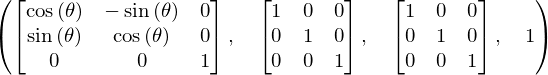

In [11]:
Rz(t), simplify(Rz(t)*Rz(t).T), simplify(Rz(t).T*Rz(t)), simplify(det(Rz(t)))

### Rotações em torno de $y$
Para rotações do referencial em torno da direção $y$ positiva, temos as seguintes relações entre os versores (veja a figura abaixo):
\begin{align}
& \hat{i'} = \hat{i}\cos\theta-\hat{k}\sin\theta, \\
& \hat{j'} = \hat{j}, \\  
& \hat{k'} = \hat{i}\sin\theta+\hat{k}\cos\theta.
\end{align}

<img src="fig_04_O3_Ry.png" width="250">

Com isso, vem que
\begin{align}
\vec{r'} & = x'(\hat{i}\cos\theta-\hat{k}\sin\theta) + y'\hat{j'} + z'(\hat{i}\sin\theta+\hat{k}\cos\theta) \\
& = (x'\cos\theta+z'\sin\theta)\hat{i} + y'\hat{j'} + (-x'\sin\theta+z'\cos\theta)\hat{k'}=\vec{r}.
\end{align}
Na forma matricial, esta equação fica escrita como segue:
\begin{equation}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix}\cos\theta & 0 & \sin\theta \\ 0 & 1 & 0 \\ -\sin\theta & 0 & \cos\theta \end{bmatrix}\begin{bmatrix} x' \\ y' \\ z' \end{bmatrix}\therefore \vec{r}=R_{y}(\theta)\vec{r'}.
\end{equation}
Como visto usando o código abaixo, $R_{y}(\theta)\in SO(3)$. Portanto $\vec{r'}=R_{y}(\theta)^{T}\vec{r}$.

In [12]:
def Ry(t):
    return Matrix([[cos(t),0,sin(t)],[0,1,0],[-sin(t),0,cos(t)]])

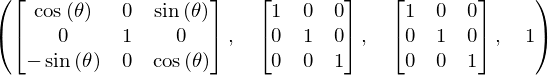

In [13]:
Ry(t), simplify(Ry(t)*Ry(t).T), simplify(Ry(t).T*Ry(t)), simplify(det(Ry(t)))

### Rotações em torno de $x$
Já para rotações do referencial em torno da direção $x$ positiva, temos as seguintes relações entre os versores (veja a figura abaixo):
\begin{align}
& \hat{i'} = \hat{i}, \\
& \hat{j'} = \hat{j}\cos\theta+\hat{k}\sin\theta, \\  
& \hat{k'} = -\hat{j}\sin\theta+\hat{k}\cos\theta.
\end{align}

<img src="fig_04_O3_Rx.png" width="250">

Com isso, vem que
\begin{align}
\vec{r'} & = x'\hat{i'} + y'(\hat{j}\cos\theta+\hat{k}\sin\theta) +  z'(-\hat{j}\sin\theta+\hat{k}\cos\theta) \\
& = x'\hat{i} + (y'\cos\theta-z'\sin\theta)\hat{j} + (y'\sin\theta+z'\cos\theta)\hat{k} =\vec{r}.
\end{align}
Na forma matricial, esta equação fica escrita como segue:
\begin{equation}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos\theta & -\sin\theta \\ 0 & \sin\theta & \cos\theta \end{bmatrix}\begin{bmatrix} x' \\ y' \\ z' \end{bmatrix}\therefore \vec{r}=R_{x}(\theta)\vec{r'}.
\end{equation}

In [14]:
def Rx(t):
    return Matrix([[1,0,0],[0,cos(t),-sin(t)],[0,sin(t),cos(t)]])

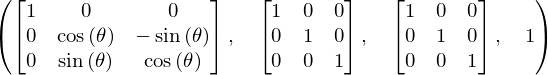

In [15]:
Rx(t), simplify(Rx(t)*Rx(t).T), simplify(Rx(t).T*Rx(t)),simplify(det(Rx(t)))

### Rotação geral em $\mathbb{R}^{3}$
Podemos escrever a matriz de rotação em $\mathbb{R}^{3}$ de forma geral e independente de referencial como segue. Como ilustrado na figura abaixo, para fazer uma rotação por um ângulo $\alpha$ em torno da direção $\hat{n}$ escolhemos $\hat{e}_{3}=\hat{n}$ e colocamos o vetor $\vec{r}$ no plano gerado por $\hat{e}_{1}$ e $\hat{e}_{3}$.

<img src="fig_rotacao_R3.png" width="250">

As componentes do vetor girado $\vec{r'}$ na base $\{\hat{e}_{1},\hat{e}_{2},\hat{e}_{3}\}$ podem ser escritas como (usamos $r'=r$):
\begin{align}
& x'_{1} = r\sin\beta\cos\alpha, \\
& x'_{2} = r\sin\beta\sin\alpha, \\
& x'_{3} = r\cos\beta.
\end{align}

Seguindo escreveremos os versores da base em termos de $\hat{n}$ e de $\vec{r}$. Claro, $\hat{e}_{3}=\hat{n}$. Além disso
\begin{align}
& \hat{e}_{2}=\frac{\hat{e}_{3}\mathrm{x}\vec{r}}{||\hat{e}_{3}\mathrm{x}\vec{r}||}=\frac{\hat{n}\mathrm{x}\vec{r}}{r\sin\beta}, \\
& \hat{e}_{1}=\hat{e}_{2}\mathrm{x}\hat{e}_{3} = \frac{(\hat{n}\mathrm{x}\vec{r})\mathrm{x}\hat{n}}{r\sin\beta}.
\end{align}

Pode-se verificar que $(\hat{n}\mathrm{x}\vec{r})\mathrm{x}\hat{n}=\hat{n}\mathrm{x}(\vec{r}\mathrm{x}\hat{n}) = \vec{r} - (\vec{r}\cdot\hat{n})\hat{n}.$ Com isso vem que
\begin{align}
\vec{r'} & = x'_{1}\hat{e}_{1} + x'_{2}\hat{e}_{2} + x'_{3}\hat{e}_{3} \\
& = r\sin\beta\cos\alpha\frac{ \vec{r} - (\vec{r}\cdot\hat{n})\hat{n}}{r\sin\beta} + r\sin\beta\sin\alpha\frac{\hat{n}\mathrm{x}\vec{r}}{r\sin\beta} + r\cos\beta\hat{n} \\
& = \cos\alpha(\vec{r} - (\vec{r}\cdot\hat{n})\hat{n}) + \sin\alpha\hat{n}\mathrm{x}\vec{r} +(\vec{r}\cdot\hat{n})\hat{n} \\
& = \left(\cos\alpha\mathbb{I}_{3} + (1-\cos\alpha)\hat{n}\hat{n}^{T} + \sin\alpha\hat{n}\mathrm{x}\right)\vec{r} \\
& =: R_{\hat{n}}(\alpha)\vec{r}.
\end{align}
Ademais, para $\vec{r}=\begin{bmatrix}r_{1}&r_{2}&r_{3}\end{bmatrix}^{T}$, podemos usar a representação matricial $$\hat{n}\text{x}=\begin{bmatrix}0&-n_{3}&n_{2} \\ n_{3}&0&-n_{1} \\ -n_{2}&n_{1}&0\end{bmatrix}.$$
Ou seja, uma matriz de rotação por um ângulo $\alpha$ em torno de uma diração qualquer $\hat{n}$ pode ser escrita como
\begin{equation}
R_{\hat{n}}(\alpha)=\begin{bmatrix} 
\cos\alpha+n_{1}^{2}(1-\cos\alpha) & -n_{3}\sin\alpha+n_{1}n_{2}(1-\cos\alpha) & n_{2}\sin\alpha +n_{1}n_{2}(1-\cos\alpha)\\
n_{3}\sin\alpha+n_{2}n_{1}(1-\cos\alpha) & \cos\alpha+n_{2}^{2}(1-\cos\alpha) & -n_{1}\sin\alpha+n_{2}n_{3}(1-\cos\alpha)\\
-n_{2}\sin\alpha+n_{3}n_{1}(1-\cos\alpha) & n_{1}\sin\alpha+n_{3}n_{2}(1-\cos\alpha) & \cos\alpha+n_{3}^{2}(1-\cos\alpha) \end{bmatrix}.
\end{equation}

### Rotações de Euler
Vimos que qualquer elemento de $U(n)$ pode ser decomposto em termos de elementos de $U(2)$. O mesmo vale para $SO(n)$ e $SO(2)$. A decomposição via rotações de Euler é frequentemente usada. Nessa decomposição, fazemos:
* Uma rotação por um ângulo $\phi$ em torno do eixo $z$, que será implementada através da matriz de rotação $R_{z}(\phi)$.
* Uma rotação por um ângulo $\theta\in[0,\pi]$ em torno de $x'$, que é implementada por $R_{x'}(\theta)$.
* Uma rotação por um ângulo $\psi$ em torno do eixo $z'$, que implementamos usando $R_{z'}(\psi)$.
Essa sequência está exemplificada na figura abaixo.
<img src="fig_04_euler.png" width="600">

A matriz de rotação obtida via essa composição está mostrada abaixo.

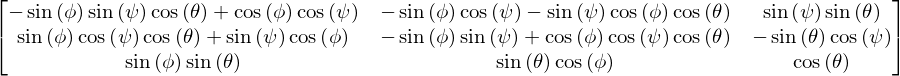

In [16]:
f, p = symbols("phi psi"); Re = Rz(p)*Rx(t)*Rz(f); simplify(Re)

## Por quê $SO(3)$ é utilizado para descrever rotações "Físicas"?
Notemos que $-\mathbb{I}_{3}\in O(3)$ pois $(-\mathbb{I}_{3})(-\mathbb{I}_{3})^{T}=(-\mathbb{I}_{3})^{T}(-\mathbb{I}_{3})=\mathbb{I}_{3}$ e $\det(-\mathbb{I}_{3})=-1$. Mas 
\begin{equation}
-\mathbb{I}_{3}\begin{bmatrix}\hat{e}_{1} \\ \hat{e}_{2} \\ \hat{e}_{3}\end{bmatrix}=\begin{bmatrix}-\hat{e}_{1} \\ -\hat{e}_{2} \\ -\hat{e}_{3}\end{bmatrix}.
\end{equation}
Ou seja, $-\mathbb{I}_{3}$ é um operador de inversão espacial. Agora, temos o produto vetorial 
\begin{equation}
\hat{e}_{j}\mathrm{x}\hat{e}_{k}=\epsilon_{jkl}\hat{e}_{l},
\end{equation}
o que caracteriza um __sistema de coordenadas destrógiro__ (SCD). Já para os versores depois da inversão espacial, teremos
\begin{equation}
(-\hat{e}_{j})\mathrm{x}(-\hat{e}_{k})=-\epsilon_{jkl}(-\hat{e}_{l}),
\end{equation}
o que caracteriza um __sistema de coordenadas levógiro__. Então, uma maneira de evitar sair do SCD por rotações é usar matrizes com $\det = 1$, as matrizes de $SO(3)$.

## Correspondência homomórfica 2 pra 1 entre $SU(2)$ e $SO(3)$ 
Qualquer matriz complexa $2\mathrm{x}2$, Hermitiana e de traço nulo pode ser escrita em termos das matrizes de Pauli:
\begin{equation}
A=\begin{bmatrix} z & x-iy \\ x+iy & -z \end{bmatrix} = x\sigma_{x}+y\sigma_{y}+z\sigma_{z}.
\end{equation}
Considera $U\in SU(2)$ e faz a transformação de similaridade: $$A' = UAU^{\dagger}.$$ Como $A'^{\dagger}=(UAU^{\dagger})^{\dagger}=UA^{\dagger}U^{\dagger}=UAU^{\dagger}=A'$ e $Tr(A')=Tr(UA^{\dagger}U^{\dagger})=Tr(A)=0$, podemos escrever
\begin{equation}
A'=\begin{bmatrix} z' & x'-iy' \\ x'+iy' & -z' \end{bmatrix} = x'\sigma_{x}+y'\sigma_{y}+z'\sigma_{z}.
\end{equation}
Como $\det(A')=\det(UAU^{\dagger})=\det(A)$, temos uma indicação da correspondência entre $SU(2)$ e $SO(3)$ por
\begin{align}
& \det(A)=-z^{2}-(x-iy)(x+iy) = -z^{2}-x^{2}-y^{2}=-r^{2}, \\
& \det(A')=-z'^{2}-(x'-iy')(x'+iy') = -z'^{2}-x'^{2}-y'^{2}=-r'^{2}.
\end{align}

Pode-se verificar que um elemento qualquer de $U\in SU(2)$ pode ser escrito como
\begin{equation}
U=\begin{bmatrix} e^{i\xi}\cos\eta & e^{i\zeta}\sin\eta  \\ -e^{-i\zeta}\sin\eta & e^{-i\xi}\cos\eta \end{bmatrix}=:U(\xi,\eta,\zeta),
\end{equation}
com $\zeta,\xi,\eta\in\mathbb{R}$.

* Continuando, vamos considerar $U(\xi,\eta=0,\zeta)=\begin{bmatrix} e^{i\xi} & 0  \\ 0 & e^{-i\xi} \end{bmatrix}=:U_{3}=U_{3}(\xi)$.

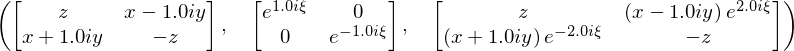

In [18]:
c, e, z = symbols("xi eta zeta",real=True); U3 = Matrix([[exp(1j*c),0],[0,exp(-1j*c)]])
x, y, z = symbols("x y z"); A = Matrix([[z,x-1j*y],[x+1j*y,-z]])
A, U3, U3*A*Dagger(U3) # = A'

Ou seja, pode-se verificar que
\begin{align}
A'&=U_{3}AU_{3}^{\dagger} \\ 
& = (x\cos(2\xi)+y\sin(2\xi))\sigma_{x} + (-x\sin(2\xi)+y\cos(2\xi))\sigma_{y} + z\sigma_{z} \\
& = x'\sigma_{x} + y'\sigma_{y} + z'\sigma_{z}.
\end{align}

Essa mesma relação é obtida usando
\begin{equation}
\vec{r'} = \begin{bmatrix}x'\\y'\\z'\end{bmatrix} = \begin{bmatrix}\cos(2\xi) & \sin(2\xi) & 0 \\ -\sin(2\xi) & \cos(2\xi) & 0 \\ 0 &  0 & 1\end{bmatrix}\begin{bmatrix}x\\y\\z\end{bmatrix} = R_{z}(-2\xi)^{T}\vec{r}.
\end{equation}
Portanto $U_{3}\in SU(2)$ é equivalente a $R_{z}\in SO_{3}$.

* Seguindo, consideremos $U(\xi=0,\eta,\zeta=0)=\begin{bmatrix}\cos\eta & \sin\eta \\ -\sin\eta & \cos\eta \end{bmatrix}=:U_{2}$.

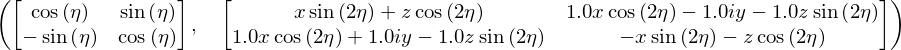

In [19]:
U2 = Matrix([[cos(e),sin(e)],[-sin(e),cos(e)]]); U2, simplify(U2*A*Dagger(U2)) # = A'

Por conseguinte
\begin{align}
A'&=U_{2}AU_{2}^{\dagger} \\ 
& = (x\cos(2\eta)-z\sin(2\eta))\sigma_{x} + y\sigma_{y} + (x\sin(2\eta)+z\cos(2\eta))\sigma_{z} \\
& = x'\sigma_{x} + y'\sigma_{y} + z'\sigma_{z}.
\end{align}
Essa transformação entre $\vec{r'}$ e $\vec{r}$ é a mesma dada pela matriz de rotação:
\begin{equation}
R_{y}(-2\eta)^{T} = \begin{bmatrix}\cos(2\eta) & 0 & -\sin(2\eta) \\ 0 & 1 & 0 \\ \sin(2\eta) & 0 & \cos(2\eta)\end{bmatrix}.
\end{equation}
Ou seja, $U_{2}\in SU(2)$ é equivalente a $R_{y}\in SO_{3}$.

* Por fim, consideremos $U(\xi=0,\eta,\zeta=\pi/2)=\begin{bmatrix} \cos\eta & i\sin\eta \\ i\sin\eta & \cos\eta\end{bmatrix}=: U_{1}$.

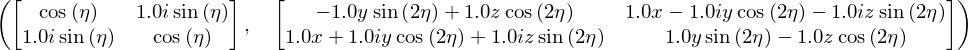

In [20]:
U1 = Matrix([[cos(e),1j*sin(e)],[1j*sin(e),cos(e)]]); U1, simplify(U1*A*Dagger(U1)) # = A'

Assim
\begin{align}
A' & = U_{1}AU_{1}^{\dagger} \\ 
& = x\sigma_{x} + (y\cos(2\eta)+z\sin(2\eta))\sigma_{y} + (-y\sin(2\eta)+z\cos(2\eta))\sigma_{z} \\
& = x'\sigma_{x} + y'\sigma_{y} + z'\sigma_{z}.
\end{align}
Essa transformação entre $\vec{r'}$ e $\vec{r}$ é a mesma dada pela matriz de rotação:
\begin{equation}
R_{x}(-2\eta)^{T} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos(2\eta) & \sin(2\eta) \\ 0 & -\sin(2\eta) & \cos(2\eta) \end{bmatrix}.
\end{equation}
Ou seja, $U_{1}\in SU(2)$ é equivalente a $R_{x}\in SO_{3}$.

* Homomorfismo
Usamos $U_{3}$ e $R_{z}$. Para $n\in\mathbb{Z}$, temos que
\begin{align}
& \cos(2\xi+n2\pi)=\cos(2\xi)\cos(n2\pi)-\sin(2\xi)\sin(n2\pi)=\cos(2\xi), \\
& \sin(2\xi+n2\pi)=\sin(2\xi)\cos(n2\pi)+\cos(2\xi)\sin(n2\pi)=\sin(2\xi), \\
& \cos((2\xi+n2\pi)/2)=\cos(\xi)\cos(n\pi)-\sin(\xi)\sin(n\pi)=(-1)^{n}\cos(\xi), \\
& \sin((2\xi+n2\pi)/2)=\sin(\xi)\cos(n\pi)+\cos(\xi)\sin(n\pi)=(-1)^{n}\sin(\xi).
\end{align}
Com isso vemos que $$R_{z}(2\xi+n2\pi)=R_{z}(2\xi)$$ e que $$U_{3}((2\xi+n2\pi)/2)=(-1)^{n}U_{3}(\xi).$$ Vemos assim que um mesmo elemento de $SO(3)$ é mapeado em dois elementos de $SU(2)$ ($\pm U_{3}$). Portanto a correspondência $$U_{2}\mapsto O_{3} \text{ é homomórfica 2 pra 1.}$$

## Grupo simplético
Matrizes simpléticas são matrizes $A$ de dimensão $2n\mathrm{x}2n$ com determinante diferente de zero que satisfazem a igualdade
\begin{equation}
A^{T}\Omega A=\Omega \text{ para } \Omega=\begin{bmatrix} \mathbb{O}_{n} & \mathbb{I}_{n} \\ -\mathbb{I}_{n} & \mathbb{O}_{n} \end{bmatrix}.
\end{equation}
Se $A$ e $B$ são matrizes simpléticas, então
\begin{equation}
(AB)^{T}\Omega AB=B^{T}A^{T}\Omega AB=B^{T}\Omega B=\Omega.
\end{equation}
Por conseguinte, matrizes simpléticas formam um grupo sob multiplicação matricial chamado de grupo simplético e denotado por $$Sp(2n,\mathbb{F}),$$ com $\mathbb{F}$ sendo o campo escalar sobre o qual as matrizes simpléticas estão definidas. Alguns exemplos de matrizes simpléticas são:
\begin{equation}
\begin{bmatrix} 1&1\\0&1 \end{bmatrix}\in Sp(2,\mathbb{R})
 \text{, }  \begin{bmatrix} \cosh\theta & \sinh\theta & 0 & \sinh\theta \\ \sinh\theta & \cosh\theta & \sinh\theta & 0 \\ 0 & 0 & \cosh\theta & -\sinh\theta \\ 0 & 0 & -\sinh\theta & \cosh\theta \end{bmatrix}\in Sp(4,\mathbb{R}).
\end{equation}
A verificação de que essas matrizes são de fato simpléticas é feita com a ajuda do código abaixo.

In [21]:
def Omeg(n): # retorna a matriz Omega definida acima
    O = zeros(2*n,2*n); O[0:n,n:2*n] = id(n); O[n:2*n,0:n] = -id(n)
    return O

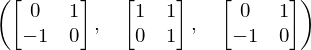

In [22]:
A1 = Matrix([[1,1],[0,1]]); Omeg(1), A1, A1.T*Omeg(1)*A1

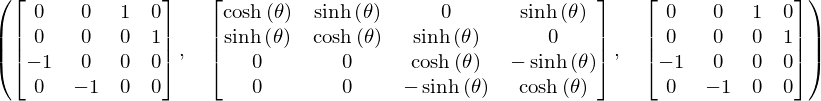

In [16]:
t = symbols("theta")
A2 = Matrix([[cosh(t),sinh(t),0,sinh(t)],[sinh(t),cosh(t),sinh(t),0],
             [0,0,cosh(t),-sinh(t)],[0,0,-sinh(t),cosh(t)]])
Omeg(2), A2, simplify(A2.T*Omeg(2)*A2)

---
# Exercícios

1. Mostre que uma matriz $n\mathrm{x}n$ unitária, sobre o campo escalar $\mathbb{C}$, é determinanda por $n^{2}-1$ parâmetros reais independentes.

1. Considere a Eq. $(\star\star)$ e verifique que $d''=\langle C_{1}^{U}|C_{2}^{U}\rangle/s'$ e $g''=\langle C_{1}^{U}|C_{3}^{U}\rangle/s'$, com $\{|C_{j}^{U}\rangle\}_{j=1}^{3}$ sendo os vetores coluna de $U$ da Eq. ($\star$).

1. Forneça um subgrupo de $U(3)$ que é isomorficamente mapeável em $U(2)$.

1. Mostre que uma matriz $n\mathrm{x}n$ ortogonal possui $n(n-1)/2$ parâmetros reais independentes.

1. No contexto das rotações em $\mathbb{R}^{n}$, faça as manipulações necessárias para mostrar que as matrizes de rotação em $\mathbb{R}^{n}$ devem satisfazer a condição: $A^{T}A=\mathbb{I}_{n}.$

1. Verifique que $(\hat{n}\mathrm{x}\vec{r})\mathrm{x}\hat{n}=\hat{n}\mathrm{x}(\vec{r}\mathrm{x}\hat{n}) = \vec{r} - (\vec{r}\cdot\hat{n})\hat{n}.$

1. Dada uma matriz qualquer $A\in SO(3)$, escreva os ângulos $\phi,\theta,\psi$ (da matriz obtida por rotações de Euler) em termos dos elementos de matriz de $A$.

1. Verifique que um elemento qualquer de $U(2)$ pode ser escrito como $U=\begin{bmatrix} e^{i\xi}\cos\eta & e^{i\zeta}\sin\eta  \\ -e^{-i\zeta}\sin\eta & e^{-i\xi}\cos\eta \end{bmatrix}.$

1. Considerando dois vetores quaisquer $\vec{a},\vec{b}\in\mathbb{R}^{3}$, verifique que o produto vetorial pode ser escrito na forma matricial: $\vec{a}\text{x}\vec{b}=\begin{bmatrix}0&-a_{3}&a_{2} \\ a_{3}&0&-a_{1} \\ -a_{2}&a_{1}&0\end{bmatrix}\begin{bmatrix}b_{1}\\b_{2}\\b_{3}\end{bmatrix}$.